In [0]:
pip install pandas_datareader

In [5]:
import pandas as pd
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2008,1,1)
end=datetime.date.today()
apple=web.DataReader("AAPL","yahoo",start,end)
apple



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,28.608572,27.507143,28.467142,27.834286,269794700.0,24.161295
2008-01-03,28.198572,27.527143,27.915714,27.847143,210516600.0,24.172449
2008-01-04,27.571428,25.555714,27.350000,25.721428,363958000.0,22.327251
2008-01-07,26.228571,24.318571,25.892857,25.377142,518048300.0,22.028393
2008-01-08,26.065714,24.400000,25.734285,24.464285,380954000.0,21.235991
...,...,...,...,...,...,...
2020-02-19,324.570007,320.000000,320.000000,323.619995,23496000.0,323.619995
2020-02-20,324.649994,318.209991,322.630005,320.299988,25141500.0,320.299988
2020-02-21,320.450012,310.500000,318.619995,313.049988,32388500.0,313.049988


In [0]:
apple.to_csv("apple.csv")

Populating the interactive namespace from numpy and matplotlib


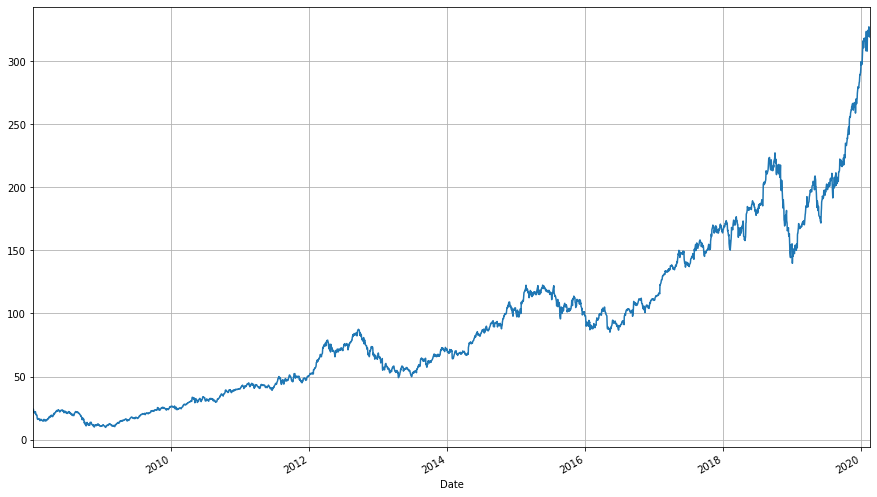

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
apple["Adj Close"].plot(grid = True)

In [0]:
from mplfinance.original_flavor import candlestick_ohlc

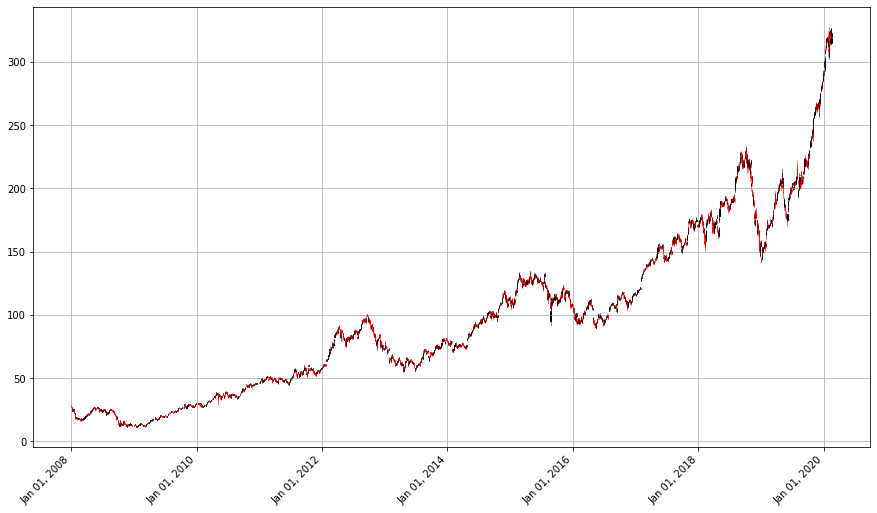

In [0]:

from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY

 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 

pandas_candlestick_ohlc(apple)


In [0]:
pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9519c8c056b5b808b939611dbb8cc74fc5306f9cbf7185ac7d8e98c878b80acc
  Stored in directory: /tmp/pip-ephem-wheel-cache-ag82a1qs/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


- get stock price for microsoft

In [0]:


import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start=datetime.datetime(2008, 1, 1)
end=datetime.datetime.today()
microsoft=web.get_data_yahoo('MSFT',start,end)
microsoft


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,35.790001,35.959999,35.000000,35.220001,26.595638,63004200
2008-01-03,35.220001,35.650002,34.860001,35.369999,26.708916,49599600
2008-01-04,35.189999,35.200001,34.090000,34.380001,25.961332,72090800
2008-01-07,34.549999,34.799999,34.250000,34.610001,26.135014,80164300
2008-01-08,34.709999,34.709999,33.400002,33.450001,25.259056,79148300
...,...,...,...,...,...,...
2020-02-12,185.580002,185.850006,181.850006,184.710007,184.710007,47062900
2020-02-13,183.080002,186.229996,182.869995,183.710007,183.710007,35295800
2020-02-14,183.250000,185.410004,182.649994,185.350006,185.350006,23149500


- get stock price for google

In [0]:

import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start=datetime.datetime(2017, 1, 1)
end=datetime.datetime.today()
google=web.get_data_yahoo('GOOG',start,end)
google


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...
2020-02-12,1514.479980,1520.694946,1508.109985,1518.270020,1518.270020,1167600
2020-02-13,1512.689941,1527.180054,1504.599976,1514.660034,1514.660034,929500
2020-02-14,1515.599976,1520.739990,1507.339966,1520.739990,1520.739990,1197800


- merge google, apple, microsoft stock prices

In [0]:

import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start=datetime.datetime(2017, 1, 1)
end=datetime.datetime.today()
 
apple=web.get_data_yahoo('AAPL',start,end)
microsoft=web.get_data_yahoo('MSFT',start,end)
google=web.get_data_yahoo('GOOG',start,end)
 
import pandas as pd
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})   

stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG
Date,,,
2017-01-03,110.691154,59.294807,786.140015
2017-01-04,110.567276,59.029503,786.900024
2017-01-05,111.129562,59.029503,794.020020
2017-01-06,112.368469,59.541157,806.150024
2017-01-09,113.397697,59.351658,806.650024
...,...,...,...
2020-02-12,327.200012,184.710007,1518.270020
2020-02-13,324.869995,183.710007,1514.660034
2020-02-14,324.950012,185.350006,1520.739990


- visualization of the stock price trend

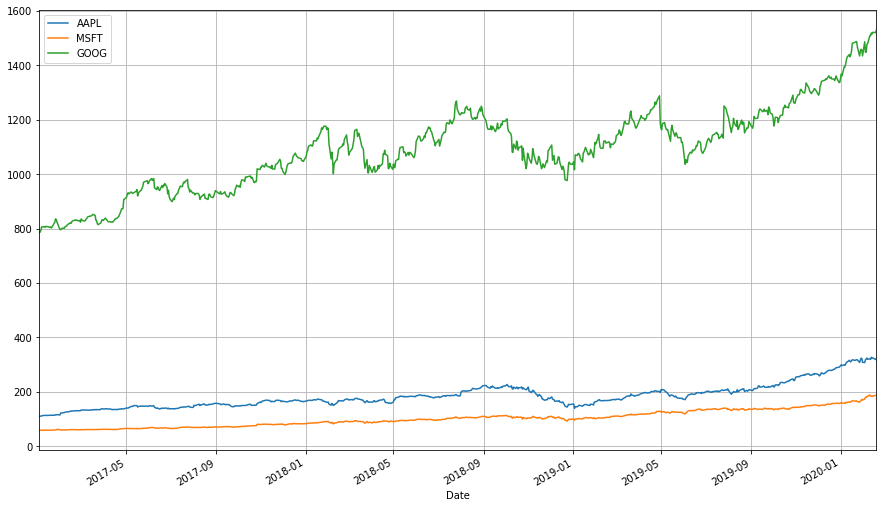

In [0]:
stocks.plot(grid = True)


- use different coordinates to display the trend

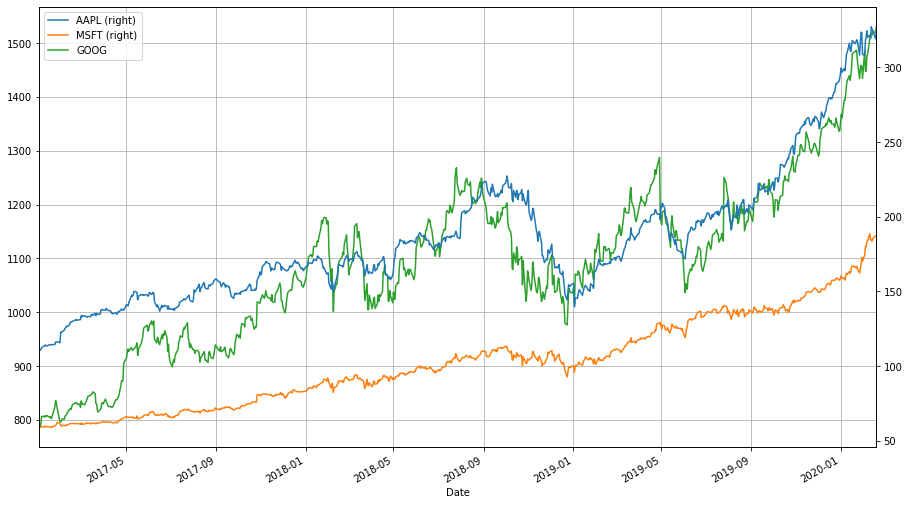

In [0]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)


- display the return of the stock

In [0]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])

stock_return.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,1.000000,1.000000,1.000000
2017-01-04,0.998881,0.995526,1.000967
2017-01-05,1.003961,0.995526,1.010024
2017-01-06,1.015153,1.004155,1.025453
2017-01-09,1.024451,1.000959,1.026090


- stock return visualization

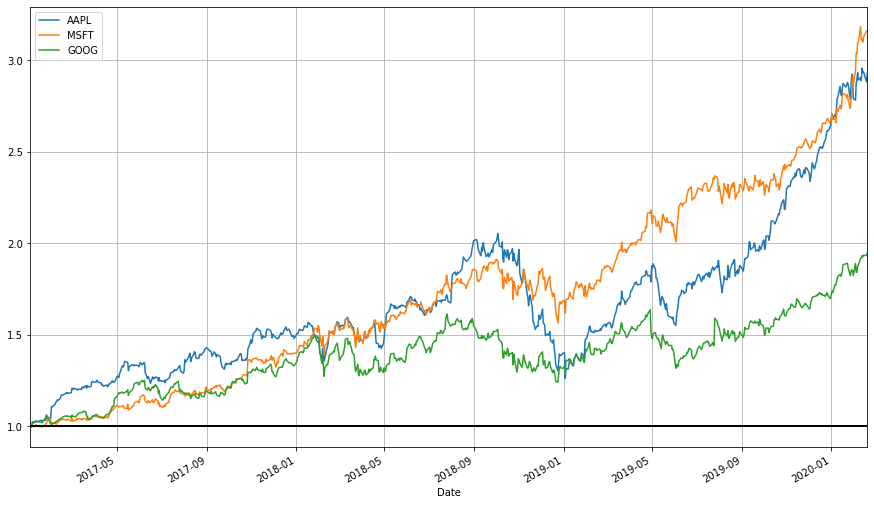

In [0]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)


- the logorithm difference of stock visualization

In [0]:
import numpy as np 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.001120,-0.004484,0.000966
2017-01-05,0.005073,0.000000,0.009007
2017-01-06,0.011087,0.008630,0.015161
2017-01-09,0.009118,-0.003188,0.000620


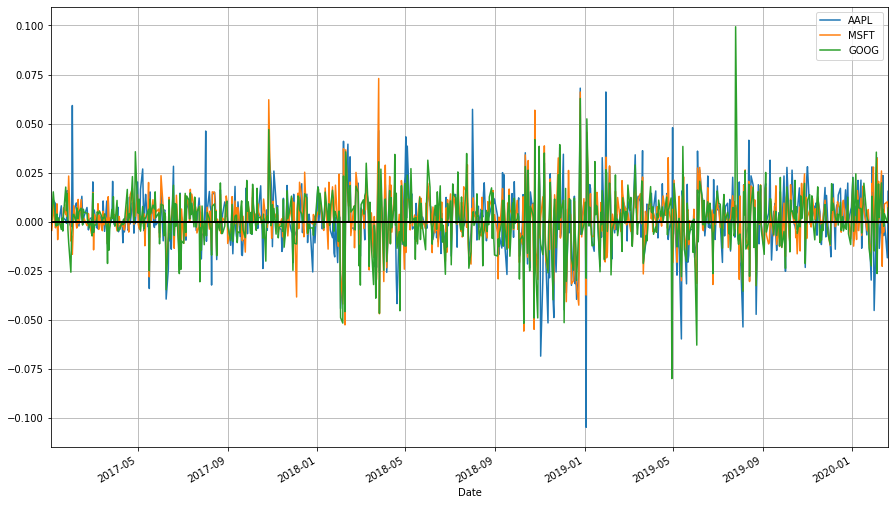

In [0]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

- 移动平均值 20days

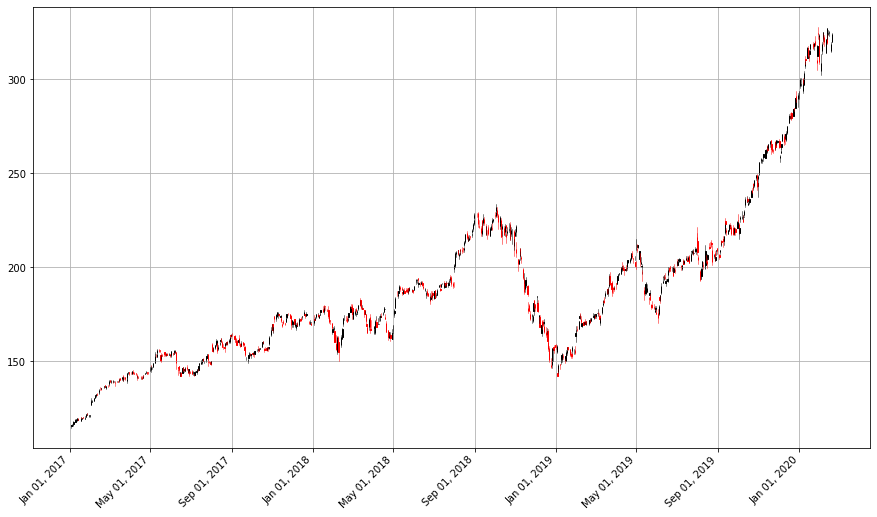

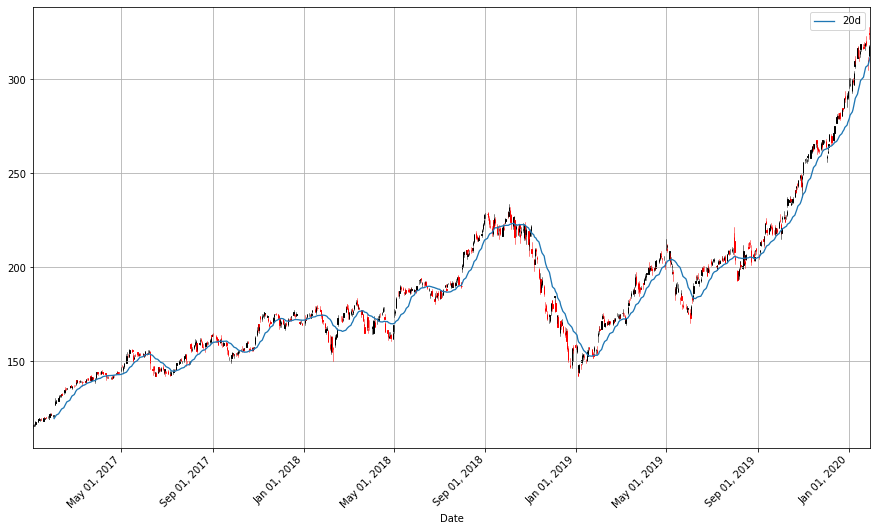

In [0]:
import pandas as pd 
pandas_candlestick_ohlc(apple)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2008-01-01':'2020-01-30',:], otherseries = "20d")


[*********************100%***********************]  1 of 1 completed


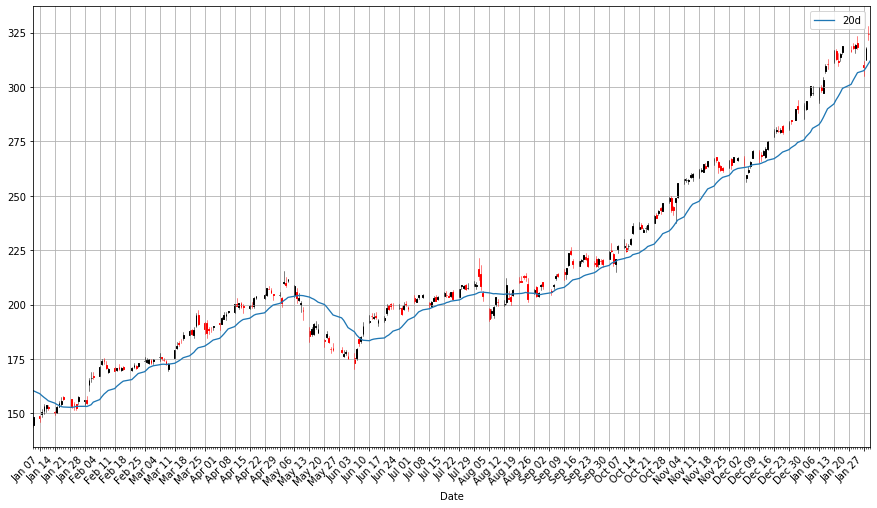

In [0]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start = datetime.datetime(2010,1,1)
apple=web.get_data_yahoo('AAPL',start,end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2019-01-04':'2020-01-30',:], otherseries = "20d")


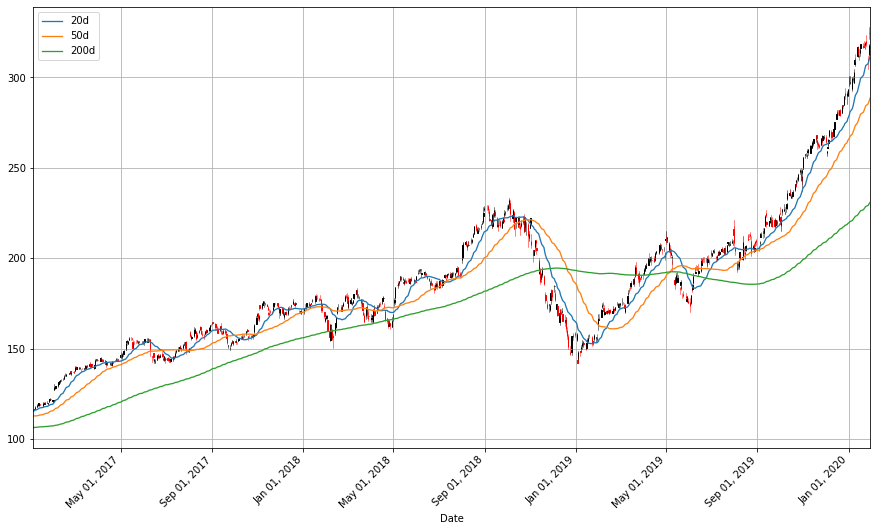

In [0]:
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2017-01-04':'2020-01-30',:], otherseries = ["20d", "50d", "200d"])


- 20 days more stable